## Machine Learning

Get a model to learn trends from  data on any topic and be able to reproduce those trends on comparable data in the future.

### Supervised Learning

- Train a model to learn trends from *labeled* data and be able to reproduce those trends and assign labels on comparable unseen data.
- Have clear distinction between independent and target/dependent variables. Use independent variables to predict target variable.
- Unseen data has known (but some times incomplete) set of independent variables and we use our model to predict target variable.

#### Two Main Types of Suprversied Learning: Classification and Regression

- Classification: Target variable is cateorical. Model categorizes observations into pre-determined (supervised) labels. Example: Given statistics, did the team win, lose, or draw (3 categories).
- Regression: Target variable is numeric. Example: Given statistics, what percentage of possession did a team have?

Question: If our target variable is the score of a soccer match? Should we use classfication or regression models? How do we design a target variable that leads to a robust model?

**Resource for R:** https://m154-comp-stats.netlify.app/notes.html

#### k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
irisData = load_iris()
irisData
print(irisData.target_names)
print(irisData.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X = irisData.data
y = irisData.target
print(len(X))
print(len(X[0]))
print(len(y))

150
4
150


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)
print(len(X_train))
print(len(X_test))

120
30


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(knn.predict([[.1,.1,.1,.1],[.4,.7,.3,.2]]))

[0 0 1 0 0 2 1 2 1 0 2 0 1 2 2 2 1 0 0 0 2 1 2 2 2 2 1 2 0 0]
[0 0]


In [ ]:
print(knn.score(X_test, y_test))

1.0


Cross Validating k (number of neighbors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

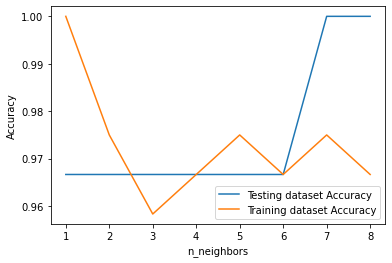

In [ ]:
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=47)
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Support Vector Machines (SVM)

https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/

In [ ]:
import numpy as np
from sklearn.datasets import make_classification # makes simulated datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

0.84
0.96


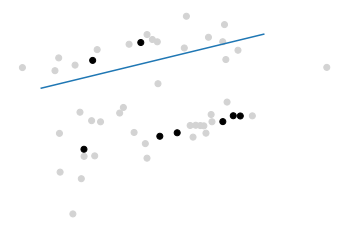

In [ ]:
classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)

model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

model.fit(X_train, y_train)

y=model.predict(X_test)
y2=model.predict(X_train)

from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)

import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)
 
# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

#### Random Forests

https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

https://m154-comp-stats.netlify.app/notes.html

# Euro 2022

In [ ]:
from google.colab import files
upload = files.upload()

Saving amfeatures.csv to amfeatures.csv
Saving asfeatures.csv to asfeatures.csv
Saving ejfeatures.csv to ejfeatures (1).csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(upload['fivefeatures.csv']))
print(df)

NameError: ignored

## k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

    duration_perc  angleratio  highpassperc
0        0.453870    0.950495      0.244949
1        0.546130    0.958621      0.214035
2        0.330696    0.967742      0.211039
3        0.669304    0.954861      0.136042
4        0.234919    1.000000      0.370690
..            ...         ...           ...
57       0.587479    0.890196      0.236515
58       0.468572    1.017544      0.220779
59       0.531428    0.942731      0.191441
60       0.481612    0.939286      0.256881
61       0.518388    1.011673      0.266667

[62 rows x 3 columns]
0     lose
1      win
2     lose
3      win
4     lose
      ... 
57     win
58    lose
59     win
60    lose
61     win
Name: outcome, Length: 62, dtype: object
0.6153846153846154


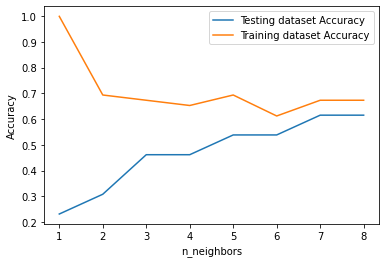

In [ ]:
# X = df[["duration_perc","angleratio", "highpassperc", "passesreceivedperc", "fouls"]]
X = df[["duration_perc","angleratio", "highpassperc"]]
y = df["outcome"]
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=49)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## SVM

In [ ]:
import numpy as np
from sklearn.datasets import make_classification # makes simulated datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Create feature and target arrays
X = df[["duration_perc","angleratio", "highpassperc", "passesreceivedperc", "fouls"]]
y = df["outcome"]
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=49)

# Create the SVM model  (SVM classifier)
model = SVC(kernel = 'linear', random_state = 47)

# Fit model on training data
model.fit(X_train, y_train)

# Make the prediction
y_pred = model.predict(X_test)
print(model.predict(X_test))

print(model.score(X_train, y_train))  # 0.983
print(model.score(X_test, y_test))    # 1.00

['lose' 'win' 'win' 'win' 'lose' 'lose' 'win' 'win' 'lose' 'win' 'lose'
 'win' 'lose']
0.5714285714285714
0.46153846153846156


## Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import metrics

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred))

accuracy: 0.5384615384615384


In [ ]:
# calculating feature importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

duration_perc         0.333037
angleratio            0.221054
passesreceivedperc    0.168695
highpassperc          0.147530
fouls                 0.129684
dtype: float64

Index(['duration_perc', 'angleratio', 'highpassperc', 'passesreceivedperc',
       'fouls'],
      dtype='object')

## All Features

In [4]:
from google.colab import files
upload = files.upload()

Saving combinedfeatures.csv to combinedfeatures.csv


In [5]:
import pandas as pd
import io
 
dfcombined = pd.read_csv(io.BytesIO(upload['combinedfeatures.csv']))
print(dfcombined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   match_id                         62 non-null     int64  
 1   team_name                        62 non-null     object 
 2   duration_perc                    62 non-null     float64
 3   angleratio                       62 non-null     float64
 4   highpassperc                     62 non-null     float64
 5   passesreceivedperc               62 non-null     float64
 6   fouls                            62 non-null     int64  
 7   percentpassdeflect               62 non-null     float64
 8   numthroughballs                  62 non-null     int64  
 9   percentpassmiscom                62 non-null     float64
 10  standing_diving                  62 non-null     int64  
 11  team_id                          62 non-null     int64  
 12  Percent_of_On_Target_Sho

In [6]:
allX = dfcombined.loc[:, "duration_perc":"count_dribbles"]
del allX["team_id"]
del allX['Previous_matches_win_percentage']
print(allX.info())
ally = dfcombined.loc[:, "outcome"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   duration_perc               62 non-null     float64
 1   angleratio                  62 non-null     float64
 2   highpassperc                62 non-null     float64
 3   passesreceivedperc          62 non-null     float64
 4   fouls                       62 non-null     int64  
 5   percentpassdeflect          62 non-null     float64
 6   numthroughballs             62 non-null     int64  
 7   percentpassmiscom           62 non-null     float64
 8   standing_diving             62 non-null     int64  
 9   Percent_of_On_Target_Shots  62 non-null     float64
 10  Total_shots                 62 non-null     int64  
 11  Ratio_of_Shots              62 non-null     float64
 12  count_dribbles              62 non-null     int64  
dtypes: float64(8), int64(5)
memory usage:

In [7]:
# Split into training and test set
from sklearn.model_selection import train_test_split
allX_train, allX_test, ally_train, ally_test = train_test_split(
             allX, ally, test_size = 0.2, random_state=49)



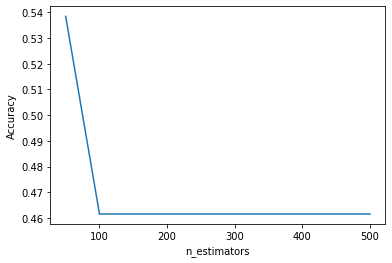

In [30]:
import matplotlib.pyplot as plt
estimators = [50,100,150,200,250,300,350,400,450,500]
accuracies = []
for n in estimators:

  allclf = RandomForestClassifier(n_estimators = n)

  allclf.fit(allX_train, ally_train)
  ally_pred = allclf.predict(allX_test)

  accuracies.append(metrics.accuracy_score(ally_test, ally_pred))

plt.plot(estimators, accuracies, label = "n_estimators accuracy")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

allX_train, allX_test, ally_train, ally_test = train_test_split(
            allX, ally, test_size = 0.2)
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [3,5,7,None],
    'max_features': [n for n in range(1,13)]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3)

# Fit the grid search to the data
grid_search.fit(allX_train, ally_train)
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 1, 'n_estimators': 50}


In [45]:
sum = 0
for i in range(100):
  allX_train, allX_test, ally_train, ally_test = train_test_split(
              allX, ally, test_size = 0.2)
  allclf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_depth = 3, max_features = 1)
  allclf.fit(allX_train, ally_train)
  ally_pred = allclf.predict(allX_test)
  sum += metrics.accuracy_score(ally_test, ally_pred)

print(sum/100)

0.6284615384615383


In [ ]:
import numpy as np

In [66]:
importances = pd.DataFrame()

for n in range(100):

  allX_train, allX_test, ally_train, ally_test = train_test_split(
             allX, ally, test_size = 0.2)
  allclf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_depth = 3, max_features = 1)
  allclf.fit(allX_train, ally_train)
  importances[str(n)] = pd.Series(allclf.feature_importances_)
  estimators.append(n)

importances['mean'] = importances.mean(axis=1)
importancesAvg = pd.Series(importances["mean"].tolist(), index = allX.columns)
print(importancesAvg.sort_values(ascending = False))

duration_perc                 0.115022
Ratio_of_Shots                0.094331
Total_shots                   0.086420
passesreceivedperc            0.083917
angleratio                    0.079696
highpassperc                  0.077905
standing_diving               0.077431
percentpassmiscom             0.071285
Percent_of_On_Target_Shots    0.071137
count_dribbles                0.067850
percentpassdeflect            0.064816
fouls                         0.062122
numthroughballs               0.048068
dtype: float64


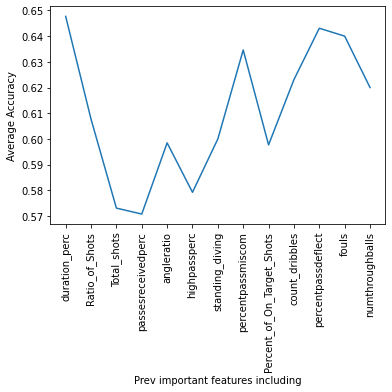

In [73]:
accuracies = []
sortedImp = importancesAvg.sort_values(ascending = False)
cols = list(sortedImp.index)
print(cols)

for i in range(len(cols)):
  sum = 0
  someX = allX.loc[:, cols[0:i+1]]
  somey = ally
  for n in range(100):
    someX_train, someX_test, somey_train, somey_test = train_test_split(
                someX, somey, test_size = 0.2)
    someclf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_depth = 3, max_features=1)
    someclf.fit(someX_train, somey_train)
    somey_pred = someclf.predict(someX_test)
    sum += metrics.accuracy_score(somey_test, somey_pred)

  accuracies.append(sum/100)

plt.plot(cols, accuracies, label = "Features accuracy")
plt.xticks(rotation=90)
plt.xlabel('Prev important features including')
plt.ylabel('Average Accuracy')
plt.show()


In [74]:
sum = 0
someX = allX.loc[:, cols[0:12]]
somey = ally
for i in range(200):
    someX_train, someX_test, somey_train, somey_test = train_test_split(
                someX, somey, test_size = 0.2)
    someclf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_depth = 3, max_features=1)
    someclf.fit(someX_train, somey_train)
    somey_pred = someclf.predict(someX_test)
    sum += metrics.accuracy_score(somey_test, somey_pred)

print(sum/200)

0.6388461538461536
